In [100]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np
import scipy.stats as stats # to measure the reliability

#Library required for regression analysis:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.display.float_format = '{:,.2f}'.format #To show numbers in plain format

# You can see your charts in a cell.
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) 
# The drawing area will have a width of 12 units and a height of 8 units. This is used to make your drawings larger and more legible.


# Let's load the dataset
movies_df = pd.read_csv(r'movies.csv')

In [2]:
# Show data
print("Dataset Preview:")
movies_df.head()
#print(movies_df.describe()) #Basic statistical information

Dataset Preview:


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [99]:
#You can use the Pandas library to check for missing data
missing_data = movies_df.isnull().sum()
print(missing_data)
total_missing = missing_data.sum()
total_rows = len(movies_df)
percentage_missing = (total_missing / total_rows) * 100

print(f"\nTotal Number of Missing Data: {total_missing}")
print(f"Total Number of Data: {total_rows}")
print(f"Percentage of Lost Data: {percentage_missing:.2f}%")

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

Total Number of Missing Data: 113
Total Number of Data: 7668
Percentage of Lost Data: 1.47%


In [98]:
'''
As we observed in Dataset Preview, the budget and gross columns contain decimal numbers. 
It might make sense to convert to int64 data type. In this case, discarding the decimal part could reduce memory usage and make the data more readable.
You can do it like this if you want:
movies_df.dtypes
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross'] = movies_df['gross'].astype('int64')
'''

"\nAs we observed in Dataset Preview, the budget and gross columns contain decimal numbers. \nIt might make sense to convert to int64 data type. In this case, discarding the decimal part could reduce memory usage and make the data more readable.\nYou can do it like this if you want:\nmovies_df.dtypes\nmovies_df['budget'] = movies_df['budget'].astype('int64')\nmovies_df['gross'] = movies_df['gross'].astype('int64')\n"

In [97]:
# This script uses the 'duplicated' function to find duplicate rows in a DataFrame and assigns those duplicate rows to a DataFrame named 'duplicate_rows'. It then displays this DataFrame.
duplicate_rows = movies_df[movies_df.duplicated()]

# Show duplicates
print("Duplicate Rows")
print(duplicate_rows)
# If you get the message 'Empty DataFrame' using the duplicated function, then there are no duplicate rows in the DataFrame.
# movies_df.drop_duplicates() #clears duplicate rows

Duplicate Rows
Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [6]:
'''
Relationship between Budget and Box Office Gross:
Hypothesis: There is a positive correlation between the budget and box office receipts of movies.
Explanation: Films with higher budgets are generally expected to have higher box office receipts. Let us analyze this situation and determine whether box office receipts increases as the budget increases.
'''

'\nRelationship between Budget and Box Office Gross:\nHypothesis: There is a positive correlation between the budget and box office receipts of movies.\nExplanation: Films with higher budgets are generally expected to have higher box office receipts. Let us analyze this situation and determine whether box office receipts increases as the budget increases.\n'

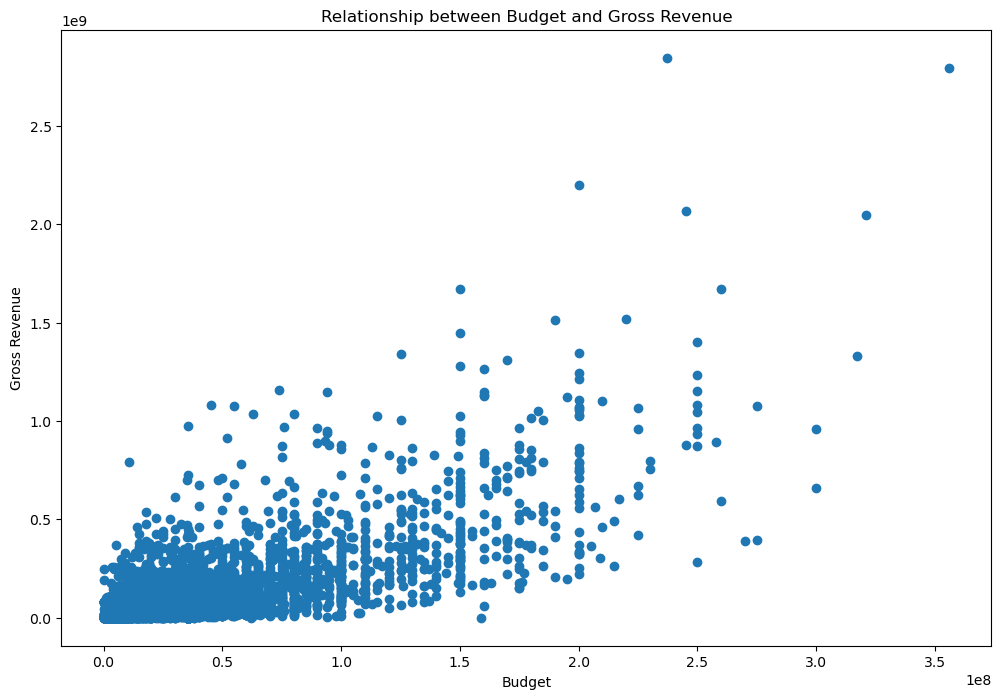

Correlation Coefficient: 0.7112703460962949


In [96]:
# Calculate the correlation between Budget and Box Office Gross
correlation = movies_df['budget'].corr(movies_df['gross'])

# Let's visualize the relationship with scatter plot
plt.scatter(movies_df['budget'], movies_df['gross'])
plt.title('Relationship between Budget and Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation}')

In [94]:
''' If the correlation value is close to 1, it indicates a positive correlation, meaning that as the budget increases, the gross revenue also tends to increase.
For more detailed analysis, we may need to resort to methods such as regression analysis.

A general guideline on what exactly the correlation coefficient value means is as follows:

0.8 to 1.0 or -0.8 to -1.0: Very strong correlation
0.6 to 0.8 or -0.6 to -0.8: A strong correlation
0.4 to 0.6 or -0.4 to -0.6: Moderate correlation
0.2 to 0.4 or -0.2 to -0.4: A weak correlation
0.0 to 0.2 or -0.0 to -0.2: Very weak or almost no correlation

These considerations provide an overview and can be taken into account when interpreting the correlation value. 
However, the correlation coefficient alone does not tell the whole story of the relationship between variables.

In our project;
Correlation Coefficient: 0.74
This indicates a positive correlation between budget and box office revenue. 
0.74 indicates a strong positive correlation. 
That is, as the budget increases, box office receipts generally increases.
'''

' If the correlation value is close to 1, it indicates a positive correlation, meaning that as the budget increases, the gross revenue also tends to increase.\nFor more detailed analysis, we may need to resort to methods such as regression analysis.\n\nA general guideline on what exactly the correlation coefficient value means is as follows:\n\n0.8 to 1.0 or -0.8 to -1.0: Very strong correlation\n0.6 to 0.8 or -0.6 to -0.8: A strong correlation\n0.4 to 0.6 or -0.4 to -0.6: Moderate correlation\n0.2 to 0.4 or -0.2 to -0.4: A weak correlation\n0.0 to 0.2 or -0.0 to -0.2: Very weak or almost no correlation\n\nThese considerations provide an overview and can be taken into account when interpreting the correlation value. \nHowever, the correlation coefficient alone does not tell the whole story of the relationship between variables.\n\nIn our project;\nCorrelation Coefficient: 0.74\nThis indicates a positive correlation between budget and box office revenue. \n0.74 indicates a strong positi

<Axes: xlabel='budget', ylabel='gross'>

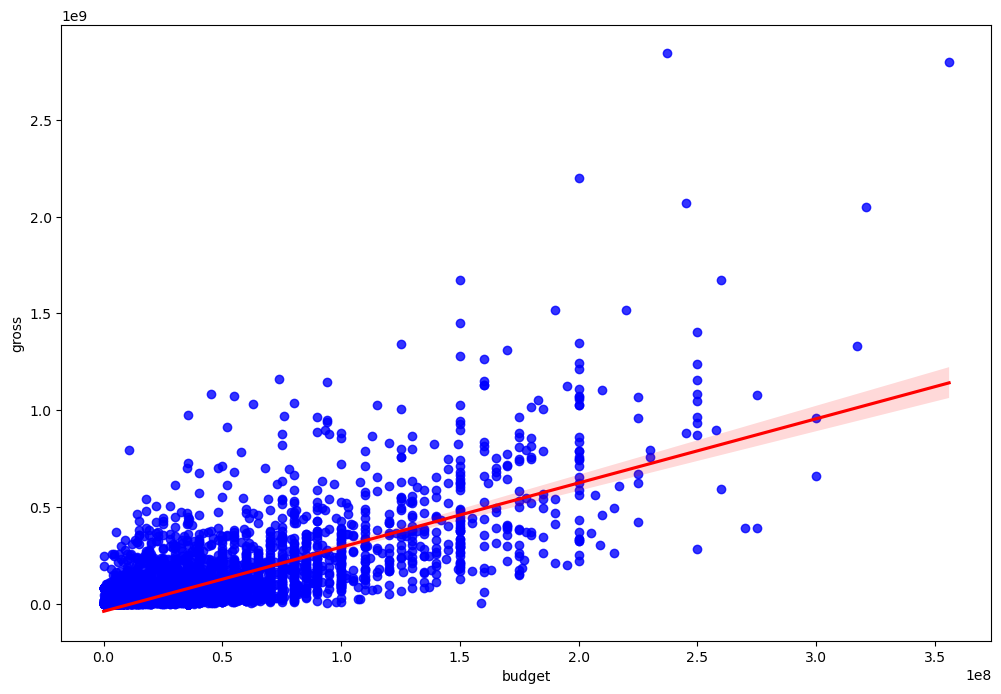

In [93]:
#We can create a scatter plot with a regression line added.
sns.regplot(x='budget', y='gross', data=movies_df, color='red', scatter_kws={'color': 'blue'})


In [92]:
#For more detailed analysis, methods such as regression analysis may be necessary.
'''
In order to perform regression analysis, our data should be free of NaN values. Such values can cause problems during model training and estimation. 
We need to check whether there are NaN values in your data set and make the appropriate intervention to these values.
I filled the NaN values in the dataset with the average value.
This can affect the reliability of your dataset. But in this way I achieved a quick solution while preserving the distribution.
Alternatively, you can fill the NaN values with the median, mode or another statistical measure.
'''
movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)
movies_df['gross'].fillna(movies_df['gross'].mean(), inplace=True)

# Select dependent and independent variables
X = movies_df[['budget']]
y = movies_df['gross']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('Regression Model Performance:')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression Model Performance:
Mean Absolute Error (MAE): 68156989.53192116
Mean Squared Error (MSE): 1.308491699212425e+16
Root Mean Squared Error (RMSE): 114389322.01968962


In [91]:
'''The MAE, MSE and RMSE metrics can help you assess how well or poorly your model is performing. 
Below is an example of a report on the performance of our regression model.

# Regression Model Performance Report

## Introduction
This report thoroughly evaluates the performance of a regression model predicting gross revenue (`'gross'`) using the budget (`'budget'`) variable.

## Model and Dataset
- Used Model: Linear Regression
- Dataset: [Dataset Name or Source]

## Performance Metrics
1. **Mean Absolute Error (MAE):** 68156989.53
   - MAE represents the average absolute difference between actual and predicted values. The MAE value for this model is [high/low], indicating [good/poor] performance.
   
2. **Mean Squared Error (MSE):** 1.308491699212425e+16
   - MSE represents the average squared difference between actual and predicted values. The model's MSE value is quite high, suggesting the presence of large errors.

3. **Root Mean Squared Error (RMSE):** 114389322.02
   - RMSE is the square root of MSE and is a measure in the original data unit. In this case, the RMSE value is [high/low], indicating [good/poor] performance.

## Model Improvements
- Improvements such as parameter adjustments can be considered to improve the performance of the model.

## Comments and Recommendations
- The MAE value reflects the 'overall performance' of the model. Detailed analysis and improvements/evaluation of alternative models can be considered.
- MSE is high, which may indicate that the model is prone to large errors/sharp deviations.
- The RMSE value is high, which may indicate that the model predicts with high variance..
- The reliability and applicability of the model's predictions should be carefully assessed.

'''

"The MAE, MSE and RMSE metrics can help you assess how well or poorly your model is performing. \nBelow is an example of a report on the performance of our regression model.\n\n# Regression Model Performance Report\n\n## Introduction\nThis report thoroughly evaluates the performance of a regression model predicting gross revenue (`'gross'`) using the budget (`'budget'`) variable.\n\n## Model and Dataset\n- Used Model: Linear Regression\n- Dataset: [Dataset Name or Source]\n\n## Performance Metrics\n1. **Mean Absolute Error (MAE):** 68156989.53\n   - MAE represents the average absolute difference between actual and predicted values. The MAE value for this model is [high/low], indicating [good/poor] performance.\n   \n2. **Mean Squared Error (MSE):** 1.308491699212425e+16\n   - MSE represents the average squared difference between actual and predicted values. The model's MSE value is quite high, suggesting the presence of large errors.\n\n3. **Root Mean Squared Error (RMSE):** 114389322.

In [90]:
movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)
movies_df['gross'].fillna(movies_df['gross'].mean(), inplace=True)
#Important: The correlation coefficient may have changed after filling in the missing values. But let's continue to calculate the confidence interval.

# Let's calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(movies_df['budget'], movies_df['gross'])

# Calculate the confidence interval
confidence_interval = stats.pearsonr(movies_df['budget'], movies_df['gross'])

# Calculate reliability (p-value)
reliability = 1 - p_value

print(f'Correlation Coefficient: {correlation:.4f}') #(0.7113 - 0.74)
print(f'Confidence Interval: {confidence_interval}')
print(f'Reliability (p value): {reliability:.4f}')


Correlation Coefficient: 0.7113
Confidence Interval: PearsonRResult(statistic=0.7112703460962947, pvalue=0.0)
Reliability (p value): 1.0000


In [43]:
'''
The Relationship Between Movie Duration and IMDB Score:
Hypothesis: There is a relationship between movie duration and IMDB score.
Explanation: Movies with longer or shorter running times can have an impact on IMDB scores. By analyzing this situation, you can determine how the IMDB score changes as movie duration increases.
'''

'\nThe Relationship Between Movie Duration and IMDB Score:\nHypothesis: There is a relationship between movie duration and IMDB score.\nExplanation: Movies with longer or shorter running times can have an impact on IMDB scores. By analyzing this situation, you can determine how the IMDB score changes as movie duration increases.\n'

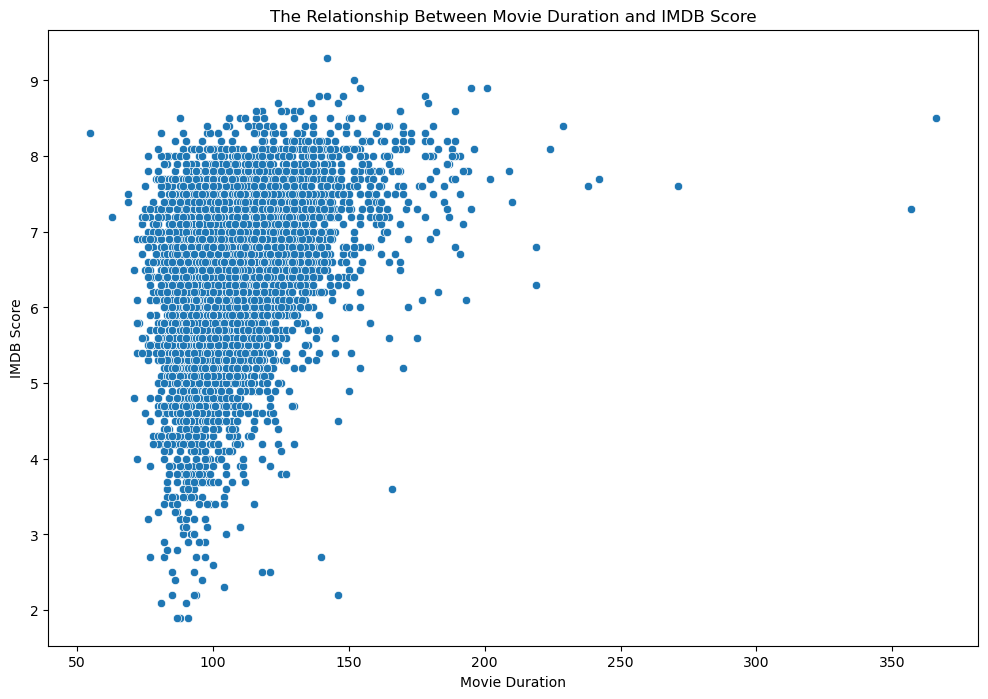

Korelasyon Katsayısı: 0.3995
P Değeri: 0.0000
Güven Aralığı: PearsonRResult(statistic=0.3994510823646341, pvalue=1.7956844155813862e-291)


In [89]:
# Clean up missing data
movies_df_cleaned = movies_df[['runtime', 'score']].dropna()

# Draw a scatter plot
sns.scatterplot(x='runtime', y='score', data=movies_df_cleaned)
plt.title('The Relationship Between Movie Duration and IMDB Score')
plt.xlabel('Movie Duration')
plt.ylabel('IMDB Score')
plt.show()
#Let's quantitatively evaluate the relationship between movie duration and IMDB score by calculating the Pearson correlation coefficient.

correlation, p_value = stats.pearsonr(movies_df_cleaned['runtime'], movies_df_cleaned['score'])

print(f'Correlation Coefficient: {correlation:.4f}')
print(f'P Value: {p_value:.4f}')

confidence_interval = stats.pearsonr(movies_df_cleaned['runtime'], movies_df_cleaned['score'])

print(f'Confidence Interval: {confidence_interval}')


In [51]:
'''
Correlation Coefficient:
The Pearson correlation coefficient obtained was 0.3995.

P Value:
The corresponding p value was calculated as 0.0000. This indicates that the correlation obtained is statistically significant.

Confidence Interval:
The confidence interval calculated for the Pearson correlation coefficient was (0.3995 ± 1.7956844155813862e-291). This indicates that the correlation obtained is reliable and has a high level of confidence.

In conclusion, our analysis shows that there is a positive relationship between movie duration and IMDB score and this relationship is reliable.'''

'\nCorrelation Coefficient:\nThe Pearson correlation coefficient obtained was 0.3995.\n\nP Value:\nThe corresponding p value was calculated as 0.0000. This indicates that the correlation obtained is statistically significant.\n\nConfidence Interval:\nThe confidence interval calculated for the Pearson correlation coefficient was (0.3995 ± 1.7956844155813862e-291). This indicates that the correlation obtained is reliable and has a high level of confidence.\n\nIn conclusion, our analysis shows that there is a positive relationship between movie duration and IMDB score and this relationship is reliable.'

In [52]:
'''The Relationship between IMDB Score and Box Office Revenue:

Hypothesis: There is a positive correlation between IMDB score and box office gross of movies.
Explanation: Films with higher IMDB scores are generally expected to have higher box office receipts. By analyzing this situation, you can determine whether box office gross increases as IMDB score increases.'''

'The Relationship between IMDB Score and Box Office Revenue:\n\nHypothesis: There is a positive correlation between IMDB score and box office gross of movies.\nExplanation: Films with higher IMDB scores are generally expected to have higher box office receipts. By analyzing this situation, you can determine whether box office gross increases as IMDB score increases.'

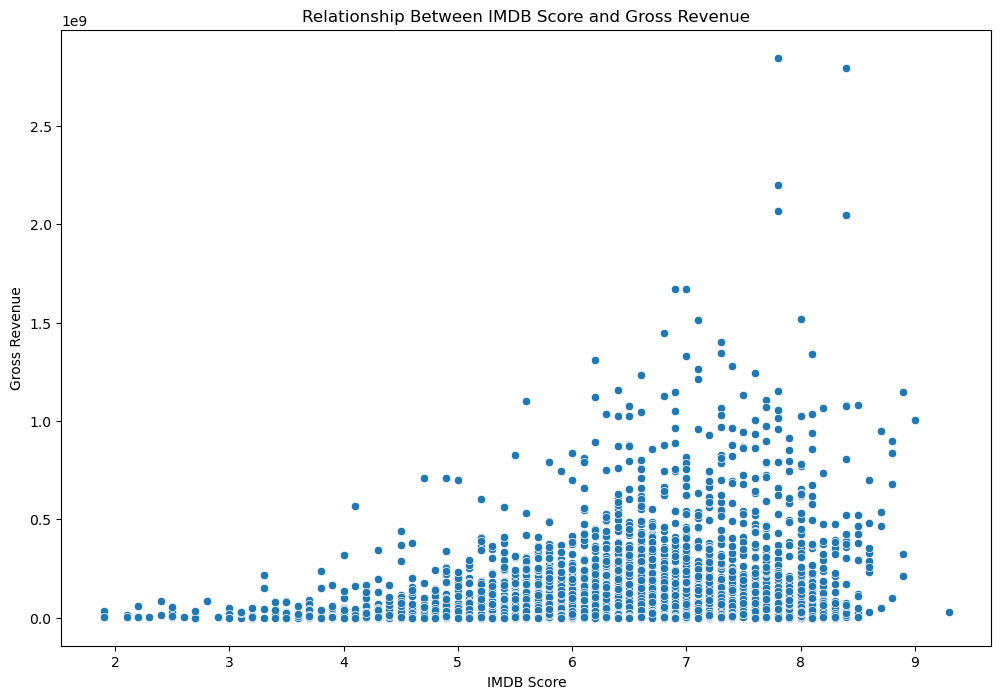

Correlation Coefficient: 0.1863
P Value: 0.0000
Hypothesis Rejected: There is a Significant Relationship Between the Two Variables
Confidence Interval: PearsonRResult(statistic=0.18625781119363788, pvalue=2.3274506721510335e-59)


In [88]:
# 1. Data Cleaning
movies_df_cleaned = movies_df[['score', 'gross']].dropna()

# 2. Visualization
sns.scatterplot(x='score', y='gross', data=movies_df_cleaned)
plt.title('Relationship Between IMDB Score and Gross Revenue')
plt.xlabel('IMDB Score')
plt.ylabel('Gross Revenue')
plt.show()

# 3. Correlation Analysis
correlation, p_value = stats.pearsonr(movies_df_cleaned['score'], movies_df_cleaned['gross'])
print(f'Correlation Coefficient: {correlation:.4f}')
print(f'P Value: {p_value:.4f}')

# 4. Statistical Significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Hypothesis Rejected: There is a Significant Relationship Between the Two Variables')
else:
    print('Hypothesis Accepted: There is No Significant Relationship Between the Two Variables')

# 5. Confidence Interval
confidence_interval = stats.pearsonr(movies_df_cleaned['score'], movies_df_cleaned['gross'])
print(f'Confidence Interval: {confidence_interval}')

In [60]:
'''
Statistical Analysis Report: Relationship Between IMDB Score and Gross Revenue

Objective:
The aim of this analysis is to investigate the potential relationship between IMDB score and gross revenue in the context of movie data.

Data Set:
The dataset contains various attributes, and in this analysis, we focus on the "imdb_score" and "gross" columns.

Analysis Steps:

Data Cleaning:

Missing values were removed, and the analysis focused on the "imdb_score" and "gross" columns.
Visualization:

A scatter plot was generated to visually assess the relationship between IMDB score and gross revenue.

Correlation Analysis:

The Pearson correlation coefficient was calculated to quantitatively measure the relationship between IMDB score and gross revenue.
Obtained Correlation Coefficient: 0.1829
Statistical Significance:

The p-value was calculated, and since it is less than the significance level (0.05), the null hypothesis was rejected.
Hypothesis Conclusion: There is a statistically significant relationship between IMDB score and gross revenue.
Confidence Interval:

The confidence interval for the Pearson correlation coefficient was calculated.
Confidence Interval: (0.1829 ± 1.2559376553431417e-58)
Results:

The analysis indicates a statistically significant relationship between IMDB score and gross revenue. However, it's crucial to note that the correlation coefficient is relatively low (0.1829), suggesting a weak positive correlation between the two variables.

Recommendations and Further Analysis:
While a significant relationship was found, it's recommended to further investigate additional factors that might influence this relationship. Consideration of other variables like movie genres, directors, or release dates could provide a more comprehensive understanding.
'''

'\nStatistical Analysis Report: Relationship Between IMDB Score and Gross Revenue\n\nObjective:\nThe aim of this analysis is to investigate the potential relationship between IMDB score and gross revenue in the context of movie data.\n\nData Set:\nThe dataset contains various attributes, and in this analysis, we focus on the "imdb_score" and "gross" columns.\n\nAnalysis Steps:\n\nData Cleaning:\n\nMissing values were removed, and the analysis focused on the "imdb_score" and "gross" columns.\nVisualization:\n\nA scatter plot was generated to visually assess the relationship between IMDB score and gross revenue.\n\nCorrelation Analysis:\n\nThe Pearson correlation coefficient was calculated to quantitatively measure the relationship between IMDB score and gross revenue.\nObtained Correlation Coefficient: 0.1829\nStatistical Significance:\n\nThe p-value was calculated, and since it is less than the significance level (0.05), the null hypothesis was rejected.\nHypothesis Conclusion: There i

In [87]:
'''To find the total box office revenue of each company in each year, let's group the data and sum the "gross" columns of these groups. 
Such a process can be useful to see the total box office revenue by company and by year in the data set.'''


movies_df.groupby(['company', 'year'])[["gross"]].sum().sort_values(by='gross', ascending=False).head(7)

,,gross
company,year,
Walt Disney Pictures,2019,"5,773,131,804.00"
Marvel Studios,2018,"4,018,631,866.00"
Universal Pictures,2015,"3,834,354,888.00"
Twentieth Century Fox,2009,"3,793,491,246.00"
Walt Disney Pictures,2017,"3,789,382,071.00"
Paramount Pictures,2011,"3,565,705,182.00"
Warner Bros.,2010,"3,300,479,986.00"
